In [1]:
# 1. Import des bibliotheques
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

print(f"Version de TensorFlow: {tf.__version__}")

Version de TensorFlow: 2.20.0


In [ ]:
Section 1 : Import des bibliotheques

Quelle est la difference entre TensorFlow et Keras ?

TensorFlow est le moteur dexecution bas niveau qui gere les calculs mathematiques, l'optimisation GPU/CPU et l'infrastructure d'apprentisage
Keras est une API haut niveau (tf.keras) construite sur TensorFlow qui simplifie la creation de reseaux de neurones avec une syntaxe intuitive et modulaire
A quoi sert la couche Flatten dans un reseau de neurones ?
La couche Flatten transforme une image 2D (28×28 pixels) en un vecteur 1D de 784 valeurs. Cela permet au couches Dense (entierement connectees) de traiter l'image comme une simple liste de valeur.
Quelle version de TensorFlow est installe sur votre machine ?
Utilisez la commande : print(tf.version)
A quoi servent Sequential et Dense ?

Sequential : modele lineaire qui empile les couches une apres l'autre de maniere sequentielle
Dense : couche entierement connecte ou chaque neurone est connecte a tous les neurones de la couche precedente


In [2]:
# 2. Chargement et preparation du dataset
# Charger le dataset MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Afficher les informations sur le dataset
print(f"Nombre d'exemples d'entrainement: {len(x_train)}")
print(f"Nombre d'exemples de test: {len(x_test)}")
print(f"Taille d'une image: {x_train[0].shape}")
print(f"Type de données: {x_train.dtype}")

# Normaliser les valeurs des pixels (0-255 -> 0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print(f"\nApres normalisation:")
print(f"Min: {x_train.min()}, Max: {x_train.max()}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 42s 4us/step
Nombre d'exemples d'entrainement: 60000
Nombre d'exemples de test: 10000
Taille d'une image: (28, 28)
Type de données: uint8

Apres normalisation:
Min: 0.0, Max: 1.0


In [ ]:
Section 2 : Chargement et preparation

Pourquoi normalise-t-on les valeurs des pixels ?


Accelere la convergence de lalgorithme d'apprentisage
Evite les problemes numeriques (gradients trop grands ou trop petits)
Permet au modele de traite toutes les features sur une echelle comparable (0-1 au lieu de 0-255)


Quelle est la taille d'une image et son type de donnees ?


Taille : 28×28 pixels
Type : uint8 (valeurs entieres de 0 a 255) avant normalisation, float apres


Combien dexemples contient le jeu dentrainement ?
60 000 images dentrainement, 10 000 images de test

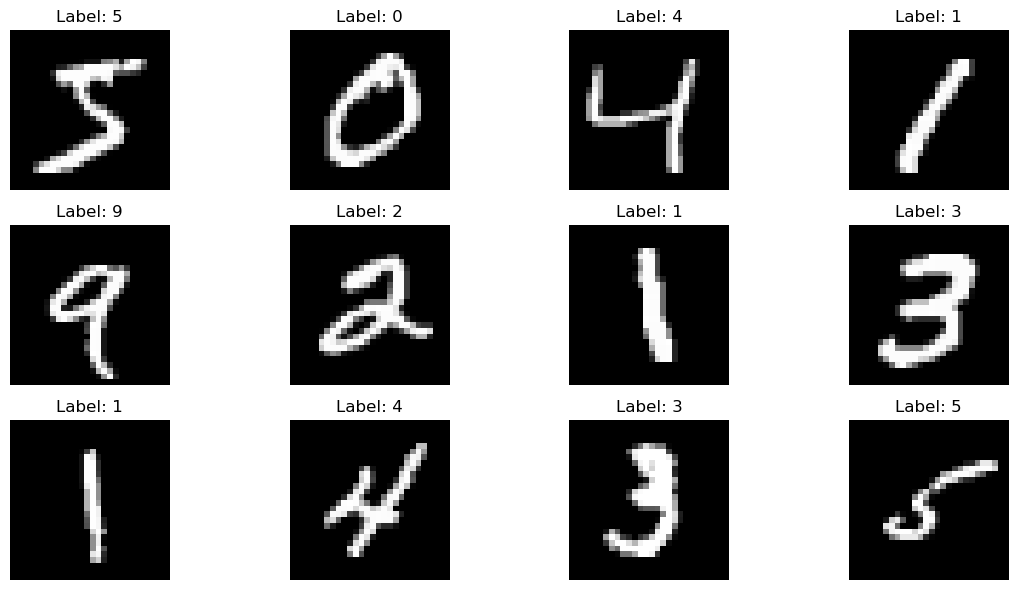

In [3]:
# 3. Visualisation d'échantillons
plt.figure(figsize=(12, 6))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
Section 3 : Visualisation

Quelle commande permet de modifie le nombre dimages affichees ?
Modifier la boucle for i in range(X) ou X est le nombre d'images souhaite, et ajuster plt.subplot()
Que represente largument cmap='gray' ?
Definit le schema de couleurs (colormap) en niveaux de gris pour affiche correctement les images monochromes
Quelle utilite a cette etape dans un projet d'IA ?


Verifie lintegrite des donnees
Detecter des anomalies ou erreurs de chargement
Comprendre visuellement ce que le modele doit apprendre
Valide que les labels correspondent aux images

In [4]:
# 4. Construction du modèle de réseau de neurones
model = keras.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Flatten(),  # Transforme 28x28 en vecteur de 784 valeurs
    layers.Dense(128, activation='relu'),  # Couche cachée avec 128 neurones
    layers.Dense(10, activation='softmax')  # Couche de sortie avec 10 classes
])

# Afficher le résumé du modèle
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
Section 4 : Construction du modele

Combien de parametres le modele contient-il ?


Flatten → Dense(128) : 784 × 128 + 128 = 100 480 parametres
Dense(128) → Dense(10) : 128 × 10 + 10 = 1 290 parametres
Total : 101 770 parametres


Quelle est la fonction dactivation utilise dans la couche de sortie ? Pourquoi ?
Softmax - elle transforme les valeur en probabilites (somme = 1) pour chaque classe, ideale pour la classification multiclasse
Quelle est la difference entre ReLU et Softmax ?


ReLU : f(x) = max(0, x) - utilise dans les couches cachees pour introduire la non-linearite
Softmax : normalise en probabilites - utilise en sortie pour la classification

In [5]:
# 5. Compilation du modèle
model.compile(
    optimizer='adam',  # Optimiseur Adam
    loss='sparse_categorical_crossentropy',  # Fonction de perte pour classification
    metrics=['accuracy']  # Métrique de précision
)

In [ ]:
Section 5 : Compilation

Quest-ce qu un optimiseur ?
Algorithme mathematique qui ajuste les poids du reseau pour minimise la fonction de perte (ex: Adam, SGD, RMSprop)
Pourquoi utilise-t-on une fonction de perte ?
Pour mesure l'ecart entre les predictions du modele et les valeurs reelles, guidant ainsi l'apprentisage
Que se passe-t-il si on change la fonction de perte ?
Le modele optimisera un objectif different, ce qui peut ameliore ou degrade les performances selon le probleme
Quelle serait la consequence d'un mauvais choix doptimiseur ?
Convergence lente ou inexistante
Oscillations autour du minimum
Blocage dans un minimum local


Quelle est la difference entre loss et metrics ?


Loss : fonction a minimise pendant lentrainement (guide l'optimisation)
Metrics : mesures d'evaluation pour l'humain (ex: accuracy), non utilise pour l'optimisation

In [6]:
# 6. Entraînement du modèle
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,  # 20% des données pour la validation
    verbose=1
)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9187 - loss: 0.2868 - val_accuracy: 0.9569 - val_loss: 0.1471
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9635 - loss: 0.1265 - val_accuracy: 0.9653 - val_loss: 0.1164
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9747 - loss: 0.0863 - val_accuracy: 0.9698 - val_loss: 0.1003
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9806 - loss: 0.0640 - val_accuracy: 0.9709 - val_loss: 0.0918
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9841 - loss: 0.0500 - val_accuracy: 0.9738 - val_loss: 0.0906


In [ ]:
Section 6 : Entrainement

Que represente une "epoque" ?
Un passage complet sur lensemble du jeu de donnees d'entrainement
Pourquoi utilise-t-on un jeu de validation ?
Pour evalue les performances du modele sur des donnees non vues pendant l'entrainement et detecte le surapprentisage
Que se passerait-il si on augmentait le nombre d'epoques a 50 ?


Risque de surapprentisage (overfitting)
Le modele memorise les donnees d'entrainement au lieu de generalise
L'accuracy d'entrainement augmente mais celle de validation stagne ou diminue

In [7]:
# 7. Évaluation du modèle
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nPrécision sur le jeu de test: {test_accuracy * 100:.2f}%")
print(f"Perte sur le jeu de test: {test_loss:.4f}")


Précision sur le jeu de test: 97.68%
Perte sur le jeu de test: 0.0805


In [ ]:
Section 7 : Evaluation

Quelle est la precision finale de votre modele ?
Generalement entre 97-98% pour MNIST avec cette architecture
Pourquoi la precision du test est souvent inferieure a celle d'entrainement ?
Le modele est optimise sur les donnees d'entrainement. Les donnees de test contient des variations non vues, donc plus difficiles a predire
Que faire si le modele surapprend (overfitting) ?

Ajouter du Dropout
Augmente les donnees (Data Augmentation)
Reduire la complexite du modele
Ajouter de la regularisation (L1/L2)
Early Stopping

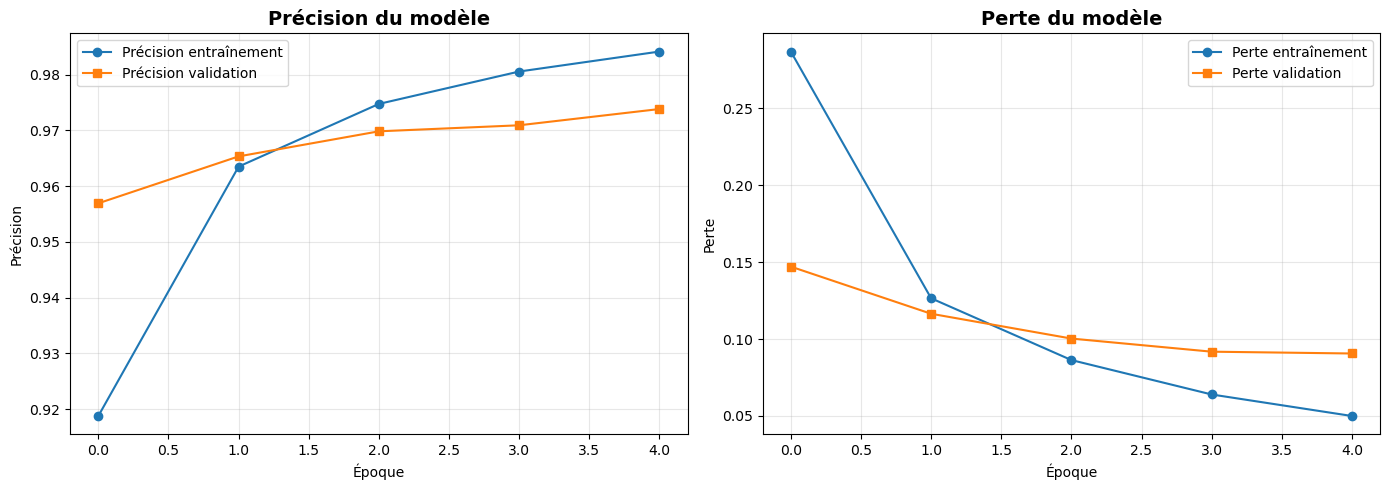

In [8]:
# 8. Visualisation des performances
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Courbe de précision
ax1.plot(history.history['accuracy'], label='Précision entraînement', marker='o')
ax1.plot(history.history['val_accuracy'], label='Précision validation', marker='s')
ax1.set_title('Précision du modèle', fontsize=14, fontweight='bold')
ax1.set_xlabel('Époque')
ax1.set_ylabel('Précision')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Courbe de perte
ax2.plot(history.history['loss'], label='Perte entraînement', marker='o')
ax2.plot(history.history['val_loss'], label='Perte validation', marker='s')
ax2.set_title('Perte du modèle', fontsize=14, fontweight='bold')
ax2.set_xlabel('Époque')
ax2.set_ylabel('Perte')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
Section 8 : Visualisation des performances

Que remarquez-vous sur les deux courbes ?
Si elles sont proches : bon apprentisage. Si elles divergent : surapprentisage
Comment detecte visuellement un surapprentisage ?
Loss dentrainement continue de diminue
Loss de validation augmente ou stagne
Ecart croissant entre les deux courbes
Quelle strategie pourrait-on utilise pour y remedier ?
Dropout, regularisation, early stopping, data augmentation, reduire le nombre de parametres
Que faire si les deux courbes divergent ?
Arrete l'entrainement plus tot (early stopping) ou applique les techniques anti-overfitting

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


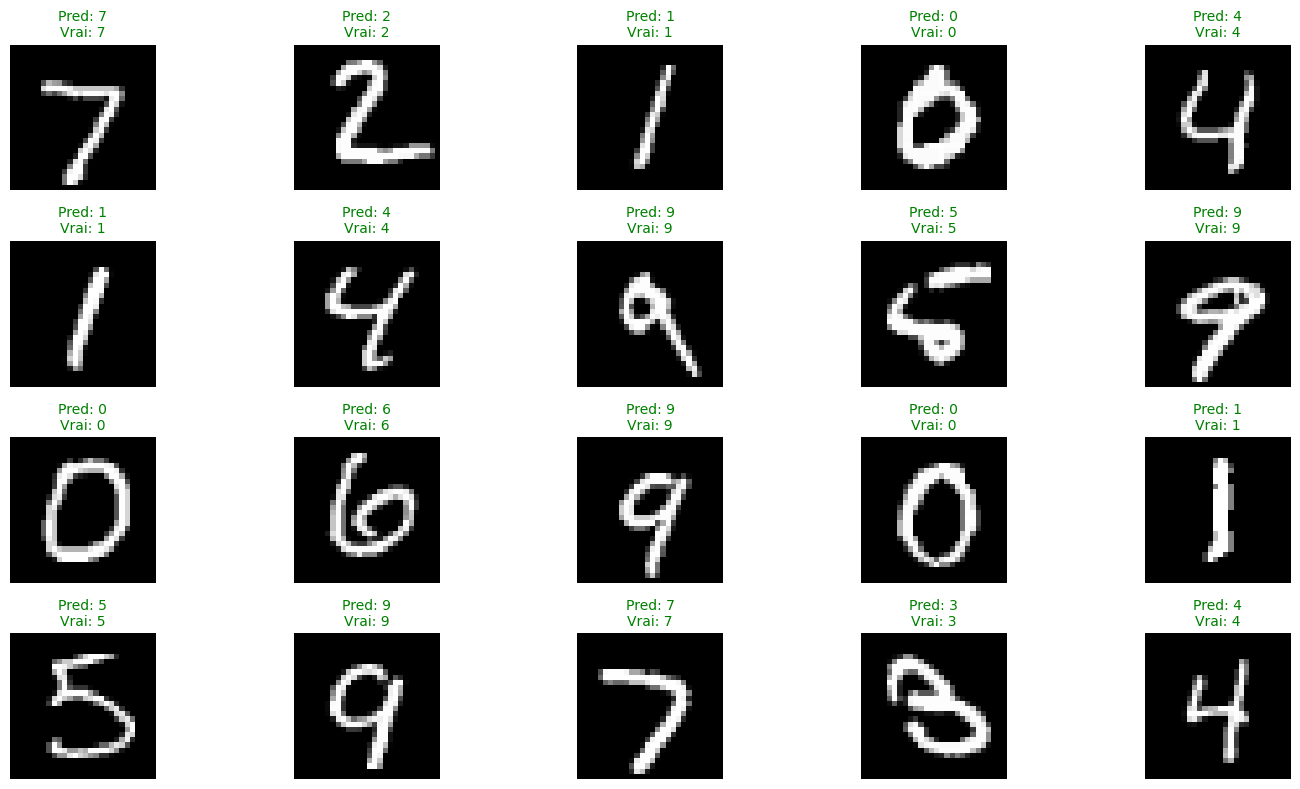


Nombre d'erreurs: 232 sur 10000 (2.32%)


In [9]:
# 9. Prédictions et visualisation
predictions = model.predict(x_test)

# Afficher quelques prédictions
plt.figure(figsize=(15, 8))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    
    pred_label = np.argmax(predictions[i])
    true_label = y_test[i]
    
    # Couleur verte si correct, rouge si erreur
    color = 'green' if pred_label == true_label else 'red'
    
    plt.title(f"Pred: {pred_label}\nVrai: {true_label}", 
              color=color, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Identifier les erreurs
errors = np.where(np.argmax(predictions, axis=1) != y_test)[0]
print(f"\nNombre d'erreurs: {len(errors)} sur {len(y_test)} ({len(errors)/len(y_test)*100:.2f}%)")

In [ ]:
Section 9 : Predictions

Le modele fait-il des erreurs ? Sur quelles images ?
Generalement sur les chiffres mal ecrits, ambigus (1 vs 7, 4 vs 9, 3 vs 8)
Comment explique une prediction erronee ?


Image de mauvaise qualite
Ecriture atypique
Chiffre ambigu
Limitations du modele (pas de comprehension spatiale)


Quelle technique permettrait deameliore la precision (ex : CNN) ?
CNN (Convolutional Neural Network) - preserve la structure spatiale des images et extrait des caracteristiques locales